In [2]:
### This is supposed to be a demo for how to do inference using the model and a new line of text


In [1]:
#General Imports
import torch
import torch.nn  as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
import random

import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter

#Load fake, non handwritten generator 
from fake_texts.pytorch_dataset_fake import Dataset

#Import the loss from baidu 
from torch_baidu_ctc import CTCLoss

#Import the model 
from fully_conv_model import cnn_attention_ocr

#Helper to count params
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
from evaluation import wer_eval,preds_to_integer,show,my_collate,AverageMeter

In [2]:
###Set up model. 
cnn=cnn_attention_ocr(model_dim=64,nclasses=93,n_layers=8)
cnn=cnn.cuda().eval()
cnn.load_state_dict(torch.load("8_layers_continued_on_blanks_340k.pt"))
count_parameters(cnn)

3543584

In [24]:
batch_size=1
width=-1
alignment=1

ds=Dataset(batch_size,epoch_size=100,random_strings=True,num_words=5,transform=True,width=width,alignment=alignment)
#Then we set up our own custom dataloade500r, with a custom collate, which packs the data
#(does the padding) Should work with variable number of widths. 

#Multiple worker leads to crash with CTC loss 
trainset = DataLoader(dataset=ds,
                      batch_size=batch_size,
                      shuffle=False,
                      collate_fn=my_collate)
gen = iter(trainset)
ge=next(gen)

In [28]:
example_image=ge[0]

In [29]:
# THe image has to be same size as the example imge 
example_image.shape

torch.Size([1, 3, 32, 174])

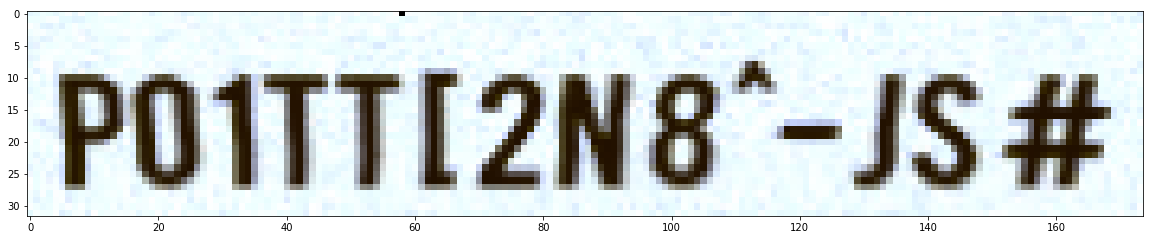

In [30]:
show(example_image.detach().cpu()[0,:,:,:])
plt.show()

In [31]:
log_probs = cnn(example_image).permute((2,0,1))[:,0,:]
#preds_to_integer(log_probs)
"".join([ds.decode_dict[j] for j in preds_to_integer(log_probs)])

'pO1TT [ 2n8^-js #'